<a href="https://colab.research.google.com/github/Adwait-Naravane/Projects--comp-phy-/blob/main/Computational%20Quantum%20Mechanics%20/wolff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import jit
from scipy.ndimage import convolve, generate_binary_structure

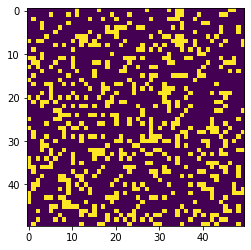

In [61]:
N = 50
init_random = np.random.random((N,N))
config = np.zeros((N,N))
config[init_random >= 0.75] = 1
config[init_random < 0.75] = -1

plt.imshow(config)


In [69]:
nbr = {(i,j):[((i+1)%N, j) , (i,(j+1)%N) , ((i-1)%N, j) , (i,(j-1)%N)] for i in range(N) for j in range(N)}

T = 2
p  = 1.0 - np.exp(-2.0 / T)
nsteps = 100

import random
for step in range(nsteps):
    k = np.random.randint(0,N)
    l = np.random.randint(0,N)
    Pocket, Cluster = [(k,l)], [(k,l)]
    while Pocket != []:
        j = random.choice(Pocket)
        for m in nbr[j]:
            if config[m] == config[j] and m not in Cluster \
                   and np.random.uniform(0.0, 1.0) < p:
                Pocket.append(m)
                Cluster.append(m)
        Pocket.remove(j)
    for j in Cluster:
        config[j] *= -1

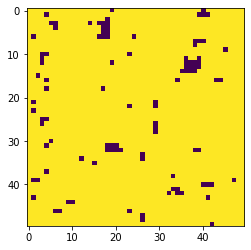

In [70]:
plt.imshow(config)